# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

In [ ]:
dataset=pd.read_csv("Data.csv")
x=dataset.iloc[:, :-1].values

y=dataset.iloc[:,-1].values
x,y

(array([['France', 44.0, 72000.0],
        ['Spain', 27.0, 48000.0],
        ['Germany', 30.0, 54000.0],
        ['Spain', 38.0, 61000.0],
        ['Germany', 40.0, nan],
        ['France', 35.0, 58000.0],
        ['Spain', nan, 52000.0],
        ['France', 48.0, 79000.0],
        ['Germany', 50.0, 83000.0],
        ['France', 37.0, 67000.0]], dtype=object),
 array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
       dtype=object))

# Filling the Missing data

In [ ]:
# Adding the mean value would be better
# Below code helps in replacing nan values with the mean value of the array
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
#Method1
#imp_mean.fit(x[:,1:3]) # calculates mean
#x[:,1:3]=imp_mean.transform(x[:,1:3]) # assigns and tranforms the array
#Method 2
x[:,1:3]=imp_mean.fit_transform(x[:,1:3])
x


array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Encoding categorical data

In [ ]:
# Now, encode the categorical data to ease the modelling
# Encoding is done using LabelEncoder and OneHotCoder
# OneHotEncoder -- Encoding other than yes/no data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')
x=(ct.fit_transform(x))
x

# After transforming the columns which are dummy variables always omit one dummy variable to stay safe from dummy variable trap
# Dummy variable trap is nothing but multi-collinearity where one or several independent features/variables predict another
# Multi-collinearity should not be there while building a linear regression model


# Assumptions for linear regression model
# Linearity
# Homoscedasticity - equal variance
# Multivariate normality (Normality of error distribution)
# Lack of Multicollinearity
# Independence - No autocorrelation 

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Splitting the dataset into the training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
# this creates 4 array of diff datasets used for the model
x_train,x_test,y_train,y_test

(array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0],
        [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 30.0, 54000.0],
        [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object),
 array([0, 1, 0, 0, 1, 1, 0, 1]),
 array([0, 1]))

# Feature Scaling

In [ ]:
# It is a technique for standardization of independent variables or features to keep the value in a fixed range ensuring one feature does not dominate others.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train) 
x_test=sc.transform(x_test) # Same scaling should be applied to test set as it should predict the output wrt the training set
# so only tranform method is applied without explicit calculation of std and mean using fit method as we already performed it in above training set

x_train, x_test

(array([[-0.77459667, -0.57735027,  1.29099445, -0.19159184, -1.07812594],
        [-0.77459667,  1.73205081, -0.77459667, -0.01411729, -0.07013168],
        [ 1.29099445, -0.57735027, -0.77459667,  0.56670851,  0.63356243],
        [-0.77459667, -0.57735027,  1.29099445, -0.30453019, -0.30786617],
        [-0.77459667, -0.57735027,  1.29099445, -1.90180114, -1.42046362],
        [ 1.29099445, -0.57735027, -0.77459667,  1.14753431,  1.23265336],
        [-0.77459667,  1.73205081, -0.77459667,  1.43794721,  1.57499104],
        [ 1.29099445, -0.57735027, -0.77459667, -0.74014954, -0.56461943]]),
 array([[-0.77459667,  1.73205081, -0.77459667, -1.46618179, -0.9069571 ],
        [ 1.29099445, -0.57735027, -0.77459667, -0.44973664,  0.20564034]]))

# Gradient Descent Method code
find the best fit line of the dataset -- using derviaties 
-> To minimise the mean squared error



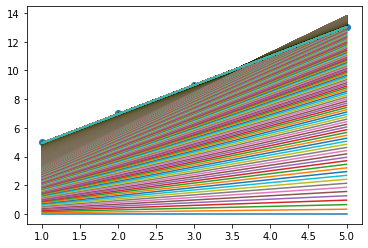

In [ ]:

def gradient_descent(x,y):
  m_curr=b_curr=0
  iterations=10000
  learning_rate=0.001
  n=len(x)
  for i in range(iterations):
    y_predicted=m_curr*x+b_curr
    cost_func=(1/n)*(sum(pow(y-y_predicted,2)))
    md=-(2/n)*sum(x*(y-y_predicted))
    bd=-(2/n)*sum((y-y_predicted))
    m_curr=m_curr-(learning_rate*md)
    b_curr=b_curr-(learning_rate*bd)
    plt.plot(x,y_predicted)
    
    #print(f"m {m_curr} y {b_curr} cost_func {cost_func} iteration {i}")
    #print(f"cost_func {cost_func} iteration {i}")

x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])
plt.scatter(x,y)
gradient_descent(x,y)

# Simple Linear Regression (SLR)

In [ ]:
# model which has the linear correlation - relationship between the features
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# importing the data
dataset=pd.read_csv("Salary_Data.csv")
# storing the data in a numpy array -- independent and dependent features in diff array's
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

# filling the missing data with mean value
imp_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
x=imp_mean.fit_transform(x)

# Encoding is not required as the data constitutes only numerical data not categorical data
# Now splitting the dataset in to training set and test set
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0) 
# Assign any random value to random_state to enusre that the dataset(training and testing) should not change after each execution
# if random value needs to generated then the best random state should be applied while splitting the dataset

# create the regressor object
regressor=linear_model.LinearRegression()
regressor.fit(x_train, y_train)
y_predicted=regressor.predict(x_test)
#plt.scatter(x_train, y_train,c='red')
plt.scatter(x_test,y_test, c='red')
plt.plot(x_train, regressor.predict(x_train), c='blue')
plt.show()

# Save model to file

In [ ]:
import pickle as pi
with open("model.csv", 'wb') as f:
  pi.dump(regressor,f)
  

# Multiple Linear Regression (MLR)


In [ ]:
# model which has the linear correlation - relationship between the features
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# importing the data
dataset=pd.read_csv("50_Startups.csv")
# storing the data in a numpy array -- independent and dependent features in diff array's
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

# filling the missing data with mean value
imp_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
x[:,:-1]=imp_mean.fit_transform(x[:,:-1])

# Encoding the categorical data --> state in this case
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x=ct.fit_transform(x)

# Dummy variable trap is automatically handled by linear regression models
# split the dataset
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)
# specify the random state or else training and test data will change randomly every time we execute which becomes difficult for analysing

# build and fit the model
regressor=linear_model.LinearRegression()
regressor.fit(x_train,y_train)

# predict the values
y_predicted=regressor.predict(x_test)

# to analyse lets reshape our arrays 
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape((len(y_test),1)), y_predicted.reshape(len(y_predicted),1)), axis=1))

# Feature Scaling is taken care by linear regression models -> the features and its coefficients compensates the scaling.
# it is done after splitting the dataset to keep the values in a fixed range to ensure that it does not calculate mean and std for the 
# whole data --> We need to make our test set adapt to other values wrt training set


# Polynomial Regression

Actually, it is the polynomial linear regression

In [ ]:
# we just need to transform the features 
# data -> polynomial_transform -> linear_regression -> predictions
# it is called as polynomial linear regression because it is the linear combination of coefficients
# as when it comes to regression we talk about the coeffients 
# It also follows the gradient descent method -- finding the best line on the dataset
# model which has the linear correlation - relationship between the features
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
# importing the data
dataset=pd.read_csv("Position_Salaries.csv")
# storing the data in a numpy array -- independent and dependent features in diff array's
x=dataset.iloc[:, 1:-1].values
y=dataset.iloc[:,-1].values

# build and fit the model
lin_reg=linear_model.LinearRegression()
lin_reg.fit(x,y)
# x should be 2d array -> Several independent features

# predict the values
lin_reg_y_predicted=lin_reg.predict(x)

plt.plot(x, lin_reg_y_predicted,c='green')

#poly_f=PolynomialFeatures(degree=2)

poly_f=PolynomialFeatures(degree=4)
x_poly=poly_f.fit_transform(x)

lin_reg_2=linear_model.LinearRegression()
lin_reg_2.fit(x_poly,y)
plt.scatter(x,y, c='red')
plt.plot(x, lin_reg_2.predict(x_poly),c='blue')



Making the curve smooth

In [ ]:
# creating an array with arange function 
x_new=np.arange(min(x), max(x), 0.1) # Making the curve smooth
x_new=x_new.reshape(len(x_new),1)
plt.scatter(x,y,c='red')
plt.plot(x, lin_reg_y_predicted,c='pink')
plt.plot(x, lin_reg_2.predict(x_poly),c='blue')
plt.plot(x_new, lin_reg_2.predict(poly_f.fit_transform(x_new)),c='green')

# Support Vector for Regression

In [ ]:
 # support vector machine
 # It has various functions -- the best one we apply is gaussian radial basis function kernel
 # The support vector for regression model is used when marginalised error is being considered.
 # It is called SVR because it has support vectors to support the tube of ksi - insensitive tube (Errors are ignored inside the tube)
 # Feature scaling also need to be applied for the independent variable and dependent variable(when values are large than independent variable) because no compensation
 # -- of coffiencients are being done incase of svr like slr,plr,mlr.
 # To visualise, we need to use the inverse_transform method of scaling object

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

dataset=pd.read_csv("Position_Salaries.csv")
x=dataset.iloc[:, 1:-1].values
y=dataset.iloc[:,-1].values
y=y.reshape(len(y),1)
# feature sclaring
# apply on x and y as the dependent var are larger
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
sc_y=StandardScaler()
y=sc_y.fit_transform(y)

# fit the model using rbf kernel
regressor=SVR(kernel='rbf')
regressor.fit(x,y)

# predictions
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1)) # accepts a 2d array of transformed value

# visualize the data
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y),c='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),c='blue')
plt.show()


For higher resolution and smoother curve

In [ ]:
x_new=np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_new=x_new.reshape(len(x_new),1)

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), c='red')
plt.plot(x_new, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_new)).reshape(-1,1)), c='blue')
plt.show()

# Decision Tree Regression

In [ ]:
# This regression is suitable for dataset with many independent features
# No feature scaling is required for decision tree regression and random forest regression as algorithm is applied on the dataset and average value is calculated of every termnal leaf
# In decision tree regression, the data is splitted into split sets or terminal leaf's
# For every terminal leaf, the average is calculated of actual y values after training the data
# the data that fall in same terminal will have the same predicted value as the average value is same for terminal leaf
# The predictions are obtained from successive splits of the data
import numpy as np
import pandas as pdg                                                                                                                        
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

dataset=pd.read_csv("Position_Salaries.csv")
x_=dataset.iloc[:,1:-1].values
y_=dataset.iloc[:,-1].values 

# no feature scaling 
# no splitting of data as we need to leverage the full data for training
regressor=DecisionTreeRegressor(random_state=0)
# Need to assign the random state or else everytime we execute the code this model splits the data differently every time and we get the diff output/predictions
regressor.fit(x_,y_)



# visualization
plt.scatter(x_,y_, c='r')
plt.plot(x_,regressor.predict(x_),c='b' )
plt.show()
# for higher resolution
x_new=np.arange(min(x_), max(x_),0.1)
x_new=x_new.reshape(len(x_new),1)
plt.scatter(x_,y_, c='r')
plt.plot(x_new,regressor.predict(x_new),c='b' )

# Random Forest Regression

In [ ]:
# Ensemble learning - use multiple learning algorithms or same algorithm multiple times for a better predictive performance than that could be obtained from any of the learning algorithms alone.
# Random forest regression is a version of ensemble learning
# first we choose k random data points from the training set and then build the decision tree
# choose the number Ntree of trees and repeat the steps 
# now predict for every decision tree and take the average of all these values
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

dataset=pd.read_csv("Position_Salaries.csv")
x_=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values 

regressor=RandomForestRegressor(n_estimators=100, random_state=0)
# the no of trees increases, better the performance
regressor.fit(x,y)

# predictions
regressor.predict([[6.5]])

x_new=np.arange(min(x), max(x),0.1)
x_new=x_new.reshape(len(x_new),1)
plt.scatter(x,y,c='brown')
plt.plot(x_new, regressor.predict(x_new), c='green')
plt.show()


# Application of all models on a single dataset and comparing the r2_score 

Evaluation of different models

Multiple Linear Regression

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


dataset=pd.read_csv("Data.csv")
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

# Scaling is compensated with the coefficients 
# No categorical data so no enocoding is done
dataset.isna().values.sum()
# no null values so go to go for splitting the data
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=1)

# lets train the model
regressor=LinearRegression()
regressor.fit(x_train,y_train)
# predictions
y_predicted=regressor.predict(x_test)
np.set_printoptions(precision=2)
np.concatenate((y_test.reshape(len(y_test),1), y_predicted.reshape(len(y_predicted),1)), axis=1)
# np.concatenate((arr1,arr2,arr3...), axis=0)
# visualize the data for test set
# higher dimesionality cannot be visulaized
# evaluate the model
regressor.score(x_train,y_train),regressor.score(x_test,y_test)

score=r2_score(y_test,y_predicted)
print(score)


0.9321860060402447


Polynomial Regression

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


dataset=pd.read_csv("Data.csv")
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

# Scaling is compensated with the coefficients 
# No categorical data so no enocoding is done
dataset.isna().values.sum()
# no null values so good to go for splitting the data
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=1)

poly=PolynomialFeatures(degree=4)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

regressor=LinearRegression()
regressor.fit(x_train_poly,y_train)

# predictions
y_predicted=regressor.predict(x_test_poly)
np.set_printoptions(precision=2)
np.concatenate((y_test.reshape(len(y_test),1), y_predicted.reshape(len(y_predicted),1)), axis=1)

score=r2_score(y_test,y_predicted)
print(score)


0.9447340108958184


Support Vector Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


dataset=pd.read_csv("Data.csv")
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

# Scaling is compensated with the coefficients 
# No categorical data so no enocoding is done
dataset.isna().values.sum()
# no null values so good to go for splitting the data
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=1)

# feature scaling is required for the support vector regression
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
# no need to fit again for test set as the same scaling done train set should be applied on test set
x_test=sc_x.transform(x_test)
sc_y=StandardScaler()
y_train=y_train.reshape(len(y_train),1)
y_train=sc_y.fit_transform(y_train)

regressor=SVR(kernel='rbf')
regressor.fit(x_train,y_train)

# predictions
y_predicted=sc_y.inverse_transform(regressor.predict(x_test).reshape(-1,1))
np.set_printoptions(precision=2)
np.concatenate((y_test.reshape(len(y_test),1), y_predicted), axis=1)

score=r2_score(y_test,y_predicted)
print(score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9479978713795594


Decision Tree Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


dataset=pd.read_csv("Data.csv")
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

# Scaling is compensated with the coefficients 
# No categorical data so no enocoding is done
dataset.isna().values.sum()
# no null values so good to go for splitting the data
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=1)

# scaling is not required for the decision tree regression and random forest regression

regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

# predictions
y_predicted=regressor.predict(x_test)
np.set_printoptions(precision=2)
np.concatenate((y_test.reshape(len(y_test),1), y_predicted.reshape(len(y_predicted),1)), axis=1)

score=r2_score(y_test,y_predicted)
print(score)

0.9342783714449767


Random Forest Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


dataset=pd.read_csv("Data.csv")
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

# Scaling is compensated with the coefficients 
# No categorical data so no enocoding is done
dataset.isna().values.sum()
# no null values so good to go for splitting the data
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=1)

# scaling is not required for the decision tree regression and random forest regression

regressor=RandomForestRegressor(n_estimators=10,random_state=1)
regressor.fit(x_train,y_train)

# predictions
y_predicted=regressor.predict(x_test)
np.set_printoptions(precision=2)
np.concatenate((y_test.reshape(len(y_test),1), y_predicted.reshape(len(y_predicted),1)), axis=1)

score=r2_score(y_test,y_predicted)
print(score)

0.9629867563235415
